In [135]:
import os
import pandas as pd

data_dir = 'C:\\Users\\Cristina Jorge\\OneDrive\\Documentos\\GitHub\\Back-End-Elo\\data'
df = pd.read_csv(os.path.join(data_dir, 'brasileiro_2003_2023.csv'))
df



,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J
0,Série A,2003.0,2003-03-29,Athletico-PR,2.0,0.0,Grêmio,VC,3.0,0.0,1.0
1,Série A,2003.0,2003-03-29,Guarani,4.0,2.0,Vasco,VC,3.0,0.0,2.0
2,Série A,2003.0,2003-03-30,Vitória,1.0,1.0,Figueirense,E,1.0,1.0,12.0
3,Série A,2003.0,2003-03-30,Goiás,2.0,2.0,Paysandu,E,1.0,1.0,4.0
4,Série A,2003.0,2003-03-30,Santos,2.0,2.0,Paraná,E,1.0,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
8412,Série A,2023.0,2023-12-06,São Paulo,1.0,0.0,Flamengo,VC,3.0,0.0,376.0
8413,Série A,2023.0,2023-12-06,Vasco,2.0,1.0,Red Bull Bragantino,VC,3.0,0.0,377.0
8414,Série A,2023.0,2023-12-06,Fluminense,2.0,3.0,Grêmio,VV,0.0,3.0,378.0
8415,Série A,2023.0,2023-12-06,Santos,1.0,2.0,Fortaleza,VV,0.0,3.0,379.0


In [136]:
df.dtypes# Assuming df is your DataFrame and 'column_name' is the column you want to change
df['Temp'] = df['Temp'].astype(str)

In [139]:
years_to_filter = ['2017.0', '2016.0', '2015.0', '2014.0', '2013.0', '2012.0']
filt = df['Temp'].isin(years_to_filter)
df = df[filt]
df.to_csv('Data/brasileiro_2012_2017.csv')

In [140]:
df

,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J
3857,Série A,2012.0,2012-05-19,Figueirense,2.0,1.0,Náutico,VC,3.0,0.0,2.0
3858,Série A,2012.0,2012-05-19,Palmeiras,1.0,1.0,Portuguesa,E,1.0,1.0,1.0
3859,Série A,2012.0,2012-05-19,Sport,1.0,1.0,Flamengo,E,1.0,1.0,3.0
3860,Série A,2012.0,2012-05-20,Cruzeiro,0.0,0.0,Atlético-GO,E,1.0,1.0,10.0
3861,Série A,2012.0,2012-05-20,Vasco,2.0,1.0,Grêmio,VC,3.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
6132,Série A,2017.0,2017-12-03,Atlético-GO,1.0,1.0,Fluminense,E,1.0,1.0,379.0
6133,Série A,2017.0,2017-12-03,Sport,1.0,0.0,Corinthians,VC,3.0,0.0,377.0
6134,Série A,2017.0,2017-12-03,Chapecoense,2.0,1.0,Coritiba,VC,3.0,0.0,380.0
6135,Série A,2017.0,2017-12-03,Botafogo,2.0,2.0,Cruzeiro,E,1.0,1.0,371.0


In [145]:
import pandas as pd

def update_team_stats(df):
    team_stats = {}

    for index, row in df.iterrows():
        home_team, away_team = row['Casa'], row['Fora']
        result = row['Res']

        # Update home team stats
        team_stats.setdefault(home_team, {'Jogos': 0, 'Vitórias': 0, 'Derrotas': 0, 'Empates': 0, 'Gols': 0, 'Pontos': 0})
        team_stats[home_team]['Jogos'] += 1
        team_stats[home_team]['Gols'] += row['GC']

        if result == 'VC':
            team_stats[home_team]['Vitórias'] += 1
            team_stats[home_team]['Pontos'] += 3
        elif result == 'VV':
            team_stats[home_team]['Derrotas'] += 1
        else:
            team_stats[home_team]['Empates'] += 1
            team_stats[home_team]['Pontos'] += 1

        # Update away team stats
        team_stats.setdefault(away_team, {'Jogos': 0, 'Vitórias': 0, 'Derrotas': 0, 'Empates': 0, 'Gols': 0, 'Pontos': 0})
        team_stats[away_team]['Jogos'] += 1
        team_stats[away_team]['Gols'] += row['GF']

        if result == 'VC':
            team_stats[away_team]['Derrotas'] += 1
        elif result == 'VV':
            team_stats[away_team]['Vitórias'] += 1
            team_stats[away_team]['Pontos'] += 3
        else:
            team_stats[away_team]['Empates'] += 1
            team_stats[away_team]['Pontos'] += 1

    # Create a DataFrame with team statistics
    team_stats_df = pd.DataFrame.from_dict(team_stats, orient='index').reset_index()
    team_stats_df = team_stats_df.rename(columns={'index': 'Time', 'Jogos': 'Partidas', 'Vitórias': 'Vitórias', 'Derrotas': 'Derrotas',
                                                  'Empates': 'Empates', 'Gols': 'Gols Marcados', 'Pontos': 'Pontuação'})

    # Calculating the percentage of victories, draws, and losses
    team_stats_df['Percentual Vitórias'] = (team_stats_df['Vitórias'] / team_stats_df['Partidas']) * 100
    team_stats_df['Percentual Empates'] = (team_stats_df['Empates'] / team_stats_df['Partidas']) * 100
    team_stats_df['Percentual Derrotas'] = (team_stats_df['Derrotas'] / team_stats_df['Partidas']) * 100

    # Calculating the percentage of total points based on the maximum possible points
    max_possible_points = team_stats_df['Partidas'] * 3
    team_stats_df['Aproveitamento'] = (team_stats_df['Pontuação'] / max_possible_points) * 100
    team_stats_df = team_stats_df.sort_values(by='Aproveitamento', ascending=False)

    return team_stats_df

# Example usage:
team_stats_df = update_team_stats(df)
print(team_stats_df)
team_stats_df.to_csv('Data/estatisticas_brasileirao_2012_2017.csv')
team_stats_df.to_excel('Data/estatisticas_brasileirao_2012_2017.csv')



             Time  Partidas  Vitórias  Derrotas  Empates  Gols Marcados  \
12    Corinthians       228       105        54       69          296.0   
9          Grêmio       228       107        62       59          283.0   
17    Atlético-MG       228       104        60       64          344.0   
6        Cruzeiro       228       106        69       53          330.0   
15         Santos       228        98        69       61          303.0   
11      São Paulo       228        99        76       53          302.0   
23   Athletico-PR       190        78        69       43          234.0   
13     Fluminense       229        90        78       61          304.0   
5        Flamengo       228        88        77       63          274.0   
18  Internacional       190        73        64       53          222.0   
2       Palmeiras       190        78        76       36          256.0   
10       Botafogo       190        72        72       46          234.0   
8           Vasco       1

ValueError: No engine for filetype: 'csv'

In [142]:
team_stats_df

,Time,Partidas,Vitórias,Derrotas,Empates,Gols Marcados,Pontuação,Percentual Vitórias,Percentual Empates,Percentual Derrotas,Aproveitamento
12,Corinthians,228,105,54,69,296.0,384,46.052632,30.263158,23.684211,56.140351
9,Grêmio,228,107,62,59,283.0,380,46.929825,25.877193,27.192982,55.555556
17,Atlético-MG,228,104,60,64,344.0,376,45.614035,28.070175,26.315789,54.970760
6,Cruzeiro,228,106,69,53,330.0,371,46.491228,23.245614,30.263158,54.239766
15,Santos,228,98,69,61,303.0,355,42.982456,26.754386,30.263158,51.900585
11,São Paulo,228,99,76,53,302.0,350,43.421053,23.245614,33.333333,51.169591
23,Athletico-PR,190,78,69,43,234.0,277,41.052632,22.631579,36.315789,48.596491
13,Fluminense,229,90,78,61,304.0,331,39.301310,26.637555,34.061135,48.180495
5,Flamengo,228,88,77,63,274.0,327,38.596491,27.631579,33.771930,47.807018
18,Internacional,190,73,64,53,222.0,272,38.421053,27.894737,33.684211,47.719298


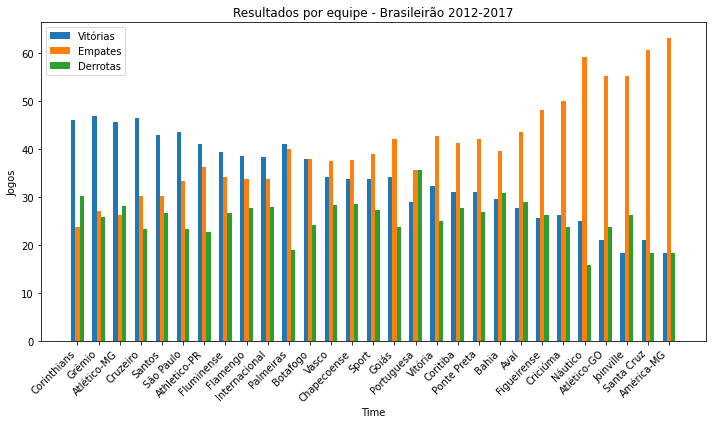

In [146]:
import matplotlib.pyplot as plt

# Assuming team_stats_df is your DataFrame with team statistics
teams = team_stats_df['Time']
victories = team_stats_df['Percentual Vitórias']
draws = team_stats_df['Percentual Derrotas']
losses = team_stats_df['Percentual Empates']

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = range(len(teams))

bar1 = ax.bar(index, victories, bar_width, label='Vitórias')
bar2 = ax.bar([i + bar_width for i in index], draws, bar_width, label='Empates')
bar3 = ax.bar([i + 2 * bar_width for i in index], losses, bar_width, label='Derrotas')

# Adding labels, title, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Jogos')
ax.set_title('Resultados por equipe - Brasileirão 2012-2017')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()

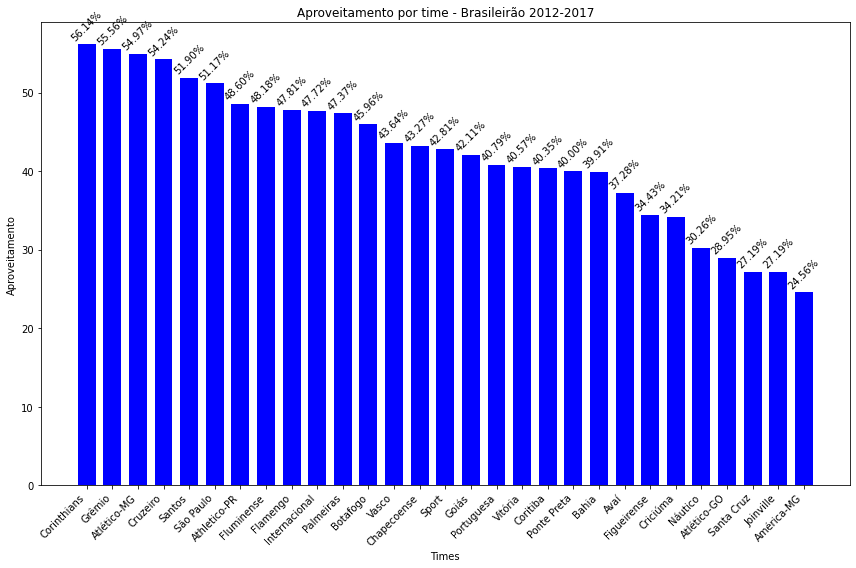

In [147]:
import matplotlib.pyplot as plt

# Assuming team_stats_df is your DataFrame with team statistics
teams = team_stats_df['Time']
victory_percentage = team_stats_df['Aproveitamento']

# Sort teams by the percentage of victories
sorted_indices = victory_percentage.argsort()[::-1]
sorted_teams = teams.iloc[sorted_indices]
sorted_percentages = victory_percentage.iloc[sorted_indices]

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figsize for more spacing

bar_width = 0.7  # Increase bar_width for more spacing
index = range(len(sorted_teams))

# Change the color to blue
bars = ax.bar(index, sorted_percentages, bar_width, color='blue')

# Adding labels, title, and legend
ax.set_xlabel('Times')
ax.set_ylabel('Aproveitamento')
ax.set_title('Aproveitamento por time - Brasileirão 2012-2017')
ax.set_xticks(index)
ax.set_xticklabels(sorted_teams, rotation=45, ha='right')

# Display the percentages on top of the bars with rotation
for bar, percentage in zip(bars, sorted_percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{percentage:.2f}%', ha='center', rotation=45)

# Display the plot
plt.tight_layout()
plt.show()
